In [19]:
from keras.datasets import mnist
from keras import models
from keras import layers
from keras.utils import to_categorical

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [15]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
X_train.dtype

dtype('uint8')

In [5]:
X_train.min(), X_train.max()

(0, 255)

In [6]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
network.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [16]:
# preprocessing data
X_train = X_train.reshape((len(X_train), -1))
X_train = X_train.astype('float32') / 255

X_test = X_test.reshape((len(X_test), -1))
X_test = X_test.astype('float32') / 255

y_train_oh = to_categorical(y_train, num_classes=10)
y_test_oh = to_categorical(y_test, num_classes=10)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 784), (60000,), (10000, 784), (10000,))

In [9]:
network.fit(X_train, y_train_oh, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 14s 235us/step - loss: 0.2528 - acc: 0.9266
Epoch 2/5
60000/60000 [==============================] - 8s 133us/step - loss: 0.1047 - acc: 0.9691
Epoch 3/5
60000/60000 [==============================] - 8s 131us/step - loss: 0.0687 - acc: 0.9797
Epoch 4/5
60000/60000 [==============================] - 8s 129us/step - loss: 0.0507 - acc: 0.9845
Epoch 5/5
60000/60000 [==============================] - 7s 123us/step - loss: 0.0376 - acc: 0.9885


In [10]:
_, test_acc = network.evaluate(X_test, y_test_oh)

10000/10000 [==============================] - 2s 246us/step


In [11]:
print('Test accuracy: {:.4f}'.format(test_acc))

Test accuracy: 0.9809


In [12]:
y_pred = network.predict_classes(X_test)

In [13]:
y_pred.shape

(10000,)

In [54]:
miss_X = X_test[(y_pred != y_test)]
miss_X = miss_X.reshape((len(miss_X), 28, 28))
y_miss = y_pred[(y_pred != y_test)]
y_true = y_test[(y_pred != y_test)]

In [48]:
miss_X.shape, y_true.shape

((191, 28, 28), (191,))

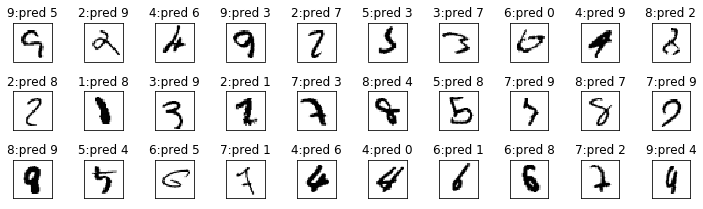

In [58]:
r, c = 3, 10
idx = np.random.choice(len(miss_X), size=r*c)

fig, ax = plt.subplots(ncols=c, nrows=r, figsize=(c, r), 
                       subplot_kw={'xticks':[], 'yticks':[]})

for axi, im, pred, true in zip(ax.flat, miss_X, y_miss, y_true):
    axi.imshow(im, cmap=plt.cm.binary)
    axi.set_title('{}:pred {}'.format(true, pred))
fig.tight_layout()

In [27]:
x.ndim

0

In [28]:
x = np.array([1,2,3])

In [29]:
x

array([1, 2, 3])

In [30]:
x.ndim

1

In [31]:
x = np.array([[1,2,3], [4,5,6]])

In [32]:
x

array([[1, 2, 3],
       [4, 5, 6]])

In [33]:
x.ndim

2

In [60]:
x = np.random.random(size=(64, 3, 32, 10))
y = np.random.random(size=(32, 10))

assert (x+y).shape == x.shape
assert np.maximum(x, y).shape == x.shape